> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDB

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For my project I want to see who is the most succesful director. In order to do this project, I will be looking at every director who has 10 or more films, and seeing who has the highest average of revenue made per film.

For the second part of my project, I want to see how the number of films a director makes, impacts their average revenue. I predict that a director who has made many films is more likely to a high revenue per film, than someone with relatively few films.

In [118]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [119]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.shape

(10866, 21)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [121]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



## Data Cleaning
1. Add a profit column, taking the budget_adj column and subtracting it from the revenue_adj column
2. Drop any uneccessary columns
3. Drop the rows where budget_adj and revenue_adj are equal to zero as there is not enough info


In [122]:
#drop the columns that don't pertain to the subject
df.drop(['homepage', 'overview', 'tagline', 'keywords', 'release_date', 'cast'], axis=1, inplace=True)

# drop the rows where revenue_adj = 0
df.drop(df.index[df['revenue_adj'] == 0], inplace = True)
df.info()

<a id='eda'></a>
## Exploratory Data Analysis



### Which Directors have made the most money per film?

In [124]:
# Find the total Director count
df.director.value_counts()

Steven Spielberg    27
Clint Eastwood      26
Woody Allen         22
Ridley Scott        22
Martin Scorsese     18
                    ..
Dylan Kidd           1
Jake Paltrow         1
Robert D. Siegel     1
Omar Naim            1
Rajkumar Hirani      1
Name: director, Length: 2133, dtype: int64

One thing that I noticed that is that many films have multiple directors. This means that when I do value_counts, films with multiple directors have count as a unique director. I need to split that up, using concat, creating multiple columns.

In [125]:
def count_director(x):
    #concatenate all the rows of the production companies.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #counts each of the genre and return.
    count = data.value_counts(ascending=False)
    return count
#Now call the function for counting the movies of each director.
dir = count_director('director')
print(dir)

Steven Spielberg    28
Clint Eastwood      26
Woody Allen         22
Ridley Scott        22
Ron Howard          18
                    ..
Anthony Leondis      1
Javier Abad          1
Michael Davis        1
Udayan Prasad        1
Ethan Maniquis       1
Length: 2284, dtype: int64


In [126]:
dir.count()

2284

In [127]:
#Create a Dataframe for Director count
director = pd.DataFrame(dir)
director = director.reset_index()
director.columns = ['director','count']
count_new2 = director[director['count'] > 10]
print(count_new2)

                director  count
0       Steven Spielberg     28
1         Clint Eastwood     26
2            Woody Allen     22
3           Ridley Scott     22
4             Ron Howard     18
5        Martin Scorsese     18
6       Robert Rodriguez     17
7             Tim Burton     17
8      Steven Soderbergh     17
9             Tony Scott     16
10       Joel Schumacher     16
11           Walter Hill     15
12          Renny Harlin     15
13       Robert Zemeckis     15
14            Wes Craven     15
15        Brian De Palma     15
16            Rob Reiner     15
17          Oliver Stone     15
18        Richard Donner     14
19        Barry Levinson     14
20        Peter Farrelly     13
21  Francis Ford Coppola     13
22        John Carpenter     13
23          Ivan Reitman     12
24        Chris Columbus     12
25     Quentin Tarantino     12
26      Lasse HallstrÃ¶m     12
27     Richard Linklater     12
28      David Cronenberg     12
29             Joel Coen     12
30      

I only want to look for well established directors, as I worry that directors who have only made a couple of films would skew the results. This is why I set the limit to 10,

In [128]:
#Merge the director dataframe with the original dataframe
df_combined = df.merge(count_new2, left_on='director', right_on='director', how='inner')
df_combined.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,count
0,286217,tt3659388,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,4572,7.6,2015,9.935996e+07,5.477497e+08,22
1,147441,tt1528100,3.813740,140000000,268031828,Exodus: Gods and Kings,Ridley Scott,153,Adventure|Drama|Action,Scott Free Productions|Chernin Entertainment|B...,1377,5.6,2014,1.289527e+08,2.468817e+08,22
2,20662,tt0955308,2.118310,200000000,310669540,Robin Hood,Ridley Scott,140,Action,Imagine Entertainment|Universal Pictures|Scott...,844,6.1,2010,2.000000e+08,3.106695e+08,22
3,855,tt0265086,1.735123,92000000,172989651,Black Hawk Down,Ridley Scott,144,Action|History|War,Jerry Bruckheimer Films|Revolution Studios|Sco...,1201,7.1,2001,1.132969e+08,2.130347e+08,22
4,9740,tt0212985,0.324227,87000000,351692268,Hannibal,Ridley Scott,131,Crime|Drama|Thriller|Horror,Universal Pictures|Scott Free Productions|Metr...,772,6.3,2001,1.071395e+08,4.331048e+08,22


In [129]:
# Sort the director values, find the average they make 
top_director = df_combined.groupby('director')['revenue_adj'].mean().sort_values(ascending = False)
top_director.head(15)

director
Peter Jackson           6.381680e+08
Steven Spielberg        5.630536e+08
Michael Bay             4.964247e+08
Chris Columbus          4.245064e+08
Robert Zemeckis         3.770432e+08
Peter Farrelly          3.637697e+08
Tim Burton              2.830803e+08
Ron Howard              2.515053e+08
Richard Donner          2.395800e+08
Brett Ratner            2.371475e+08
Ivan Reitman            2.221090e+08
Francis Ford Coppola    2.049745e+08
Tony Scott              1.972784e+08
Ridley Scott            1.917985e+08
Garry Marshall          1.914365e+08
Name: revenue_adj, dtype: float64

Here I am taking all the directors who have made 10 or more films, and I am seeing who has the highest revenue.

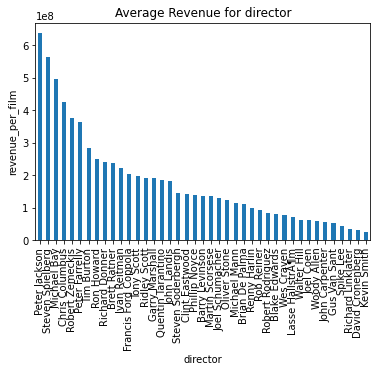

In [130]:
#Create a bar chart of directors
top_director.plot.bar()
plt.xlabel('director')
plt.ylabel('revenue_per_film')
plt.title('Average Revenue for director')
plt.show()

For this chart I took the average amount of revenue produced by each director. It appears that Peter Jackson makes the most money in his films on average.

In [131]:
top_director.groupby(['director']).describe()

,count,mean,std,min,25%,50%,75%,max
director,,,,,,,,
Barry Levinson,1.0,1.353498e+08,NaN,1.353498e+08,1.353498e+08,1.353498e+08,1.353498e+08,1.353498e+08
Blake Edwards,1.0,7.925201e+07,NaN,7.925201e+07,7.925201e+07,7.925201e+07,7.925201e+07,7.925201e+07
Brett Ratner,1.0,2.371475e+08,NaN,2.371475e+08,2.371475e+08,2.371475e+08,2.371475e+08,2.371475e+08
Brian De Palma,1.0,1.099725e+08,NaN,1.099725e+08,1.099725e+08,1.099725e+08,1.099725e+08,1.099725e+08
Chris Columbus,1.0,4.245064e+08,NaN,4.245064e+08,4.245064e+08,4.245064e+08,4.245064e+08,4.245064e+08
Clint Eastwood,1.0,1.407573e+08,NaN,1.407573e+08,1.407573e+08,1.407573e+08,1.407573e+08,1.407573e+08
David Cronenberg,1.0,3.208826e+07,NaN,3.208826e+07,3.208826e+07,3.208826e+07,3.208826e+07,3.208826e+07
Francis Ford Coppola,1.0,2.049745e+08,NaN,2.049745e+08,2.049745e+08,2.049745e+08,2.049745e+08,2.049745e+08
Garry Marshall,1.0,1.914365e+08,NaN,1.914365e+08,1.914365e+08,1.914365e+08,1.914365e+08,1.914365e+08


 ## How does the Number of Films a Director makes Correlate to How Much Money Their Films Earn?

In [132]:
df_scatter = df_combined.merge(top_director, left_on='director', right_on='director', how='inner')
df_scatter.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj_x,count,revenue_adj_y
0,286217,tt3659388,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,4572,7.6,2015,9.935996e+07,5.477497e+08,22,1.917985e+08
1,147441,tt1528100,3.813740,140000000,268031828,Exodus: Gods and Kings,Ridley Scott,153,Adventure|Drama|Action,Scott Free Productions|Chernin Entertainment|B...,1377,5.6,2014,1.289527e+08,2.468817e+08,22,1.917985e+08
2,20662,tt0955308,2.118310,200000000,310669540,Robin Hood,Ridley Scott,140,Action,Imagine Entertainment|Universal Pictures|Scott...,844,6.1,2010,2.000000e+08,3.106695e+08,22,1.917985e+08
3,855,tt0265086,1.735123,92000000,172989651,Black Hawk Down,Ridley Scott,144,Action|History|War,Jerry Bruckheimer Films|Revolution Studios|Sco...,1201,7.1,2001,1.132969e+08,2.130347e+08,22,1.917985e+08
4,9740,tt0212985,0.324227,87000000,351692268,Hannibal,Ridley Scott,131,Crime|Drama|Thriller|Horror,Universal Pictures|Scott Free Productions|Metr...,772,6.3,2001,1.071395e+08,4.331048e+08,22,1.917985e+08


Text(0.5, 1.0, '# of Films Directed vs. Avg Revenue Per Film')

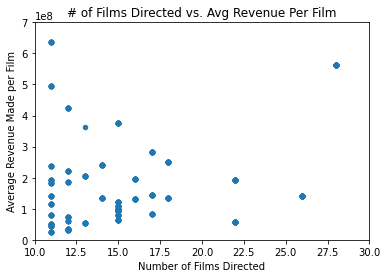

In [133]:
ax = df_scatter.plot(x='count', y='revenue_adj_y', kind='scatter')
ax.set_xlim(10, 30)
ax.set_ylim(0, 700000000)
plt.xlabel('Number of Films Directed')
plt.ylabel('Average Revenue Made per Film')
plt.title('# of Films Directed vs. Avg Revenue Per Film')

What this scatter plot shows is that there is little to no correlation on the number of films made with the amount made per film. Some directors such as Peter Jackson and Michael Bay have made relatively few films, but make tons of money. On the other hand, directors such as Clint Eastwodd and Woody Allen have made many films, but relatively low amount of revenue on their films.

<a id='conclusions'></a>
## Conclusions

According to my data, Peter Jackson is the highest earner for his films, followed by Stephen Speilberg. This isn't too surprising since Jackson directed the Lord of The Rings franchise which naturally would boost up his average, while Speilberg has directed many classic films suc as Jaws and and Raiders of the Lost Ark.

What I did find a bit surprising was that number of films directed had little impact on the revenue made. My reasoning fo why I thought a director who made many films such as Stephen Speilberg or Ridley Scott, would naturally get a higher revenue than a less well known director, based on name recognition. What I did not take into account was that I intentionally only included directors who have made 10 or more films, and virtually all of them were well established directors at this point. If I were to include every director in my scatter, I think the results would show that a higher count, would result in higher revenue. In all likelyhood there is a correlation between the number of films directed and average revenue, however the correlation disappears, when you only consider well known directors.

The one issue with my project is that about half of the data had the revenue_adj at zero, which meant all that data had to be dropped.



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [134]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255